# **FraudShield**

### **Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### **Loading the dataset**

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### **Data Cleaning**

In [3]:
# Shape of the dataset : 
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking for null values : 
df.isnull().sum()

# RESULT : The dataset has no null value.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Checking the percentage of fraudulent & non - fraudulent transactions

In [7]:
print('Non-fraud transactions: {}%'.format(round(df.Class.value_counts()[0]/len(df)*100.0,2)))
print('Fraud transactions: {}%'.format(round(df.Class.value_counts()[1]/len(df)*100.0,2)))

Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


The dataset is highly imbalanced dataset as there is only 0.17% fraud transactions. Training model on imbalanced data may result in overfitting of data hence we need to balance the data. This can be done by employing techniques like undersampling and oversampling of data.

### **Exploratory Data Analysis (EDA)**

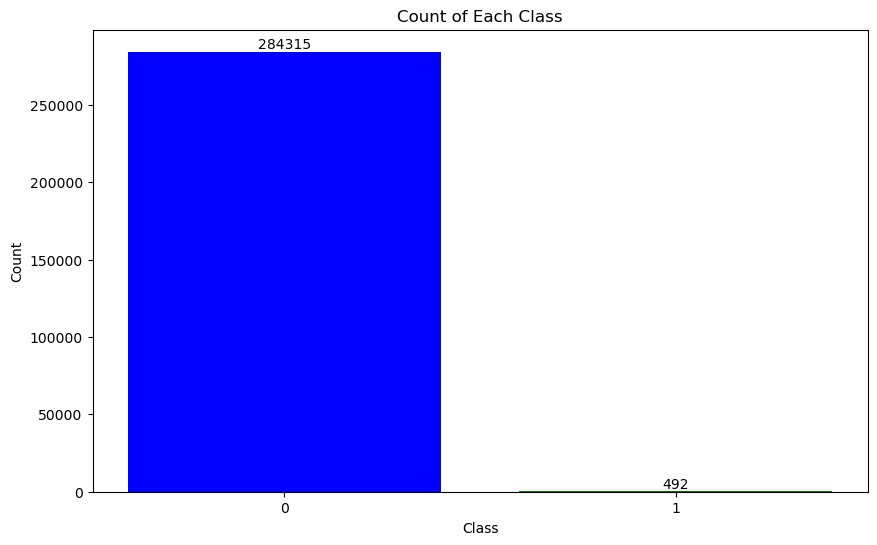

In [8]:
plt.figure(dpi=100, figsize=(10, 6))
class_counts = df['Class'].value_counts()
bars=plt.bar(class_counts.index, class_counts.values, color = ['blue', 'green'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')
plt.xticks(class_counts.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha = 'center', va = 'bottom')

plt.show()

### Time and Amount Columns are not Scaled hence scaling them to get an even valued distribution dataset.

In [9]:
# Importing the Standard Scaler for Standardization of the data : 
from sklearn.preprocessing import StandardScaler

# Initializing : 
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)

# Printing the modified dataset : 
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### **Separating the Dependent & Independent Features**

In [11]:
X = df.drop('Class', axis = 1)
y = df['Class']

### **Performing Train - Test Split**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Printing the shapes of the train & test datasets : 
print('Original Dataset:')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print("Counts of label '1' in y_train: {}".format(sum(y_train == 1)))
print("Counts of label '0' in y_train: {}".format(sum(y_train == 0)))

Original Dataset:
X_train shape: (227845, 30)
X_test shape: (56962, 30)
y_train shape: (227845,)
y_test shape: (56962,)
Counts of label '1' in y_train: 391
Counts of label '0' in y_train: 227454


### **Performing Cross - Validation on the training data (without SMOTE)**

In [14]:
# Importing the Logistic Regression Model : 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initializing the model : 
model = LogisticRegression(max_iter = 1000, random_state = 0)

# Performing Cross - Validation : 
cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')

# Printing the reuslts : 
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation scores: [0.99912221 0.99918804 0.99918804 0.99925388 0.99912221]
Mean cross-validation accuracy: 0.999174877658057


### **Applying SMOTE**

SMOTE : An Over - Sampling Technique used to balance the imbalanced data.

In [15]:
# Importing SMOTE from the library : 
from imblearn.over_sampling import SMOTE

# Initializing : 
sm = SMOTE(random_state = 2)

# Implementing SMOTE : 
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [16]:
# Printing the shapes of train & test datasets after applying SMOTE : 
print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_resampled.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resampled==0)))

After OverSampling, the shape of train_X: (454908, 30)
After OverSampling, the shape of train_y: (454908,)
After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


### **Making an Evaluation Metrics**

In [17]:
# Importing the evaluation metrics parameters : 
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score

metrics = [] # Metrics to record all the result for each model.

# **Logistic Regression**

In [18]:
# Importing the Logisitc Regression Model : 
from sklearn.linear_model import LogisticRegression

# Initializing : 
lr = LogisticRegression(random_state = 0)

# Fitting the model : 
lr.fit(X_train_resampled, y_train_resampled)

# Making predicitons : 
y_pred_lr = lr.predict(X_test)

In [19]:
# Evaluating the performance of the model : 
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)

# Adding to the Evaluation Metrics : 
metrics.append({
    'Model': 'Logistic Regression',
    'Accuracy Score': acc_lr,
    'Precision Score': prec_lr,
    'F1 Score': f1_lr,
    'Recall Score': rec_lr
})

In [20]:
# Printing the results : 
print("--- LOGISTIC REGRESSION EVALUATION ---")
print("Accuracy : ", acc_lr)
print("Precision Score : ", prec_lr)
print("F1 Score : ", f1_lr)
print("Recall Score : ", rec_lr)

--- LOGISTIC REGRESSION EVALUATION ---
Accuracy :  0.9746848776377234
Precision Score :  0.062050947093403
F1 Score :  0.11642156862745098
Recall Score :  0.9405940594059405


In [21]:
# Classification Report : 
print("Classification Report : \n")
print(classification_report(y_test, y_pred_lr))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.06      0.94      0.12       101

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.55     56962
weighted avg       1.00      0.97      0.99     56962



# **Decision Tree**

In [22]:
# Importing the Decision Tree Model : 
from sklearn.tree import DecisionTreeClassifier

# Initializing : 
dt_classifier = DecisionTreeClassifier(random_state = 0)

# Fitting the model with training data : 
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Making predictions : 
y_pred_dt = dt_classifier.predict(X_test)

In [23]:
# Evaluating the performance of the model : 
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)

# Adding to the Evaluation Metrics : 
metrics.append({
    'Model': 'Decision Tree',
    'Accuracy Score': acc_dt,
    'Precision Score': prec_dt,
    'F1 Score': f1_dt,
    'Recall Score': rec_dt
})

In [24]:
# Printing the results : 
print("--- DECISION TREE CLASSIFIER EVALUATION ---")
print("Accuracy : ", acc_dt)
print("Precision Score : ", prec_dt)
print("F1 Score : ", f1_dt)
print("Recall Score : ", rec_dt)

--- DECISION TREE CLASSIFIER EVALUATION ---
Accuracy :  0.9977177767634563
Precision Score :  0.42328042328042326
F1 Score :  0.5517241379310345
Recall Score :  0.7920792079207921


In [25]:
# Classification Report : 
print("Classification Report : \n")
print(classification_report(y_test, y_pred_dt))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.42      0.79      0.55       101

    accuracy                           1.00     56962
   macro avg       0.71      0.90      0.78     56962
weighted avg       1.00      1.00      1.00     56962



# **Random Forest**

In [26]:
# Importing the Random Forest Classifier : 
from sklearn.ensemble import RandomForestClassifier

# Initializing : 
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6, random_state = 0)

# Fitting the model with the training data : 
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Making predictions : 
y_pred_rf = rf_classifier.predict(X_test)


In [27]:
# Evaluating the performance of the model : 
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)

# Adding to the Evaluation Metrics : 
metrics.append({
    'Model': 'Random Forest',
    'Accuracy Score': acc_rf,
    'Precision Score': prec_rf,
    'F1 Score': f1_rf,
    'Recall Score': rec_rf
})

In [28]:
# Printing the results : 
print("--- RANDOM FOREST CLASSIFIER EVALUATION ---")
print("Accuracy : ", acc_rf)
print("Precision Score : ", prec_rf)
print("F1 Score : ", f1_rf)
print("Recall Score : ", rec_rf)

--- RANDOM FOREST CLASSIFIER EVALUATION ---
Accuracy :  0.9972086654260736
Precision Score :  0.375
F1 Score :  0.5225225225225225
Recall Score :  0.8613861386138614


In [29]:
# Classification Report : 
print("Classification Report : \n")
print(classification_report(y_test, y_pred_rf))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.38      0.86      0.52       101

    accuracy                           1.00     56962
   macro avg       0.69      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962



# **XGBoost Classifier**


In [30]:
# Importing the XGBoost Classifier : 
from xgboost import XGBClassifier

# Initializing the model : 
xgb_classifier = XGBClassifier(n_estimators = 300, max_depth = 6, random_state = 0)

# Fitting the model on the data :
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Making predictions :
y_pred_xgb = xgb_classifier.predict(X_test)


In [31]:
# Evaluating the model :
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)

# Adding the results to the metrics list : 
metrics.append({
    'Model': 'XGBoost',
    'Accuracy Score': acc_xgb,
    'Precision Score': prec_xgb,
    'F1 Score': f1_xgb,
    'Recall Score': rec_xgb
})

In [32]:
# Displaying evaluation results : 
print("--- XGBOOST CLASSIFIER EVALUATION ---")
print("Accuracy : ", acc_xgb)
print("Precision Score : ", prec_xgb)
print("F1 Score : ", f1_xgb)
print("Recall Score : ", rec_xgb)

--- XGBOOST CLASSIFIER EVALUATION ---
Accuracy :  0.9993153330290369
Precision Score :  0.7870370370370371
F1 Score :  0.8133971291866029
Recall Score :  0.8415841584158416


In [33]:
# Classification Report : 
print("Classification Report : \n")
print(classification_report(y_test, y_pred_xgb))

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.79      0.84      0.81       101

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# **Comparing the Results of all the models**

In [34]:
# Converting the evaluation metrics into a DataFrame : 
metrics_df = pd.DataFrame(metrics)
print("\nModel Performance Comparison:\n")
print(metrics_df)


Model Performance Comparison:

                 Model  Accuracy Score  Precision Score  F1 Score  \
0  Logistic Regression        0.974685         0.062051  0.116422   
1        Decision Tree        0.997718         0.423280  0.551724   
2        Random Forest        0.997209         0.375000  0.522523   
3              XGBoost        0.999315         0.787037  0.813397   

   Recall Score  
0      0.940594  
1      0.792079  
2      0.861386  
3      0.841584  


In [35]:
metrics_df = metrics_df.reset_index(drop=True)
metrics_df

,Model,Accuracy Score,Precision Score,F1 Score,Recall Score
0,Logistic Regression,0.974685,0.062051,0.116422,0.940594
1,Decision Tree,0.997718,0.423280,0.551724,0.792079
2,Random Forest,0.997209,0.375000,0.522523,0.861386
3,XGBoost,0.999315,0.787037,0.813397,0.841584


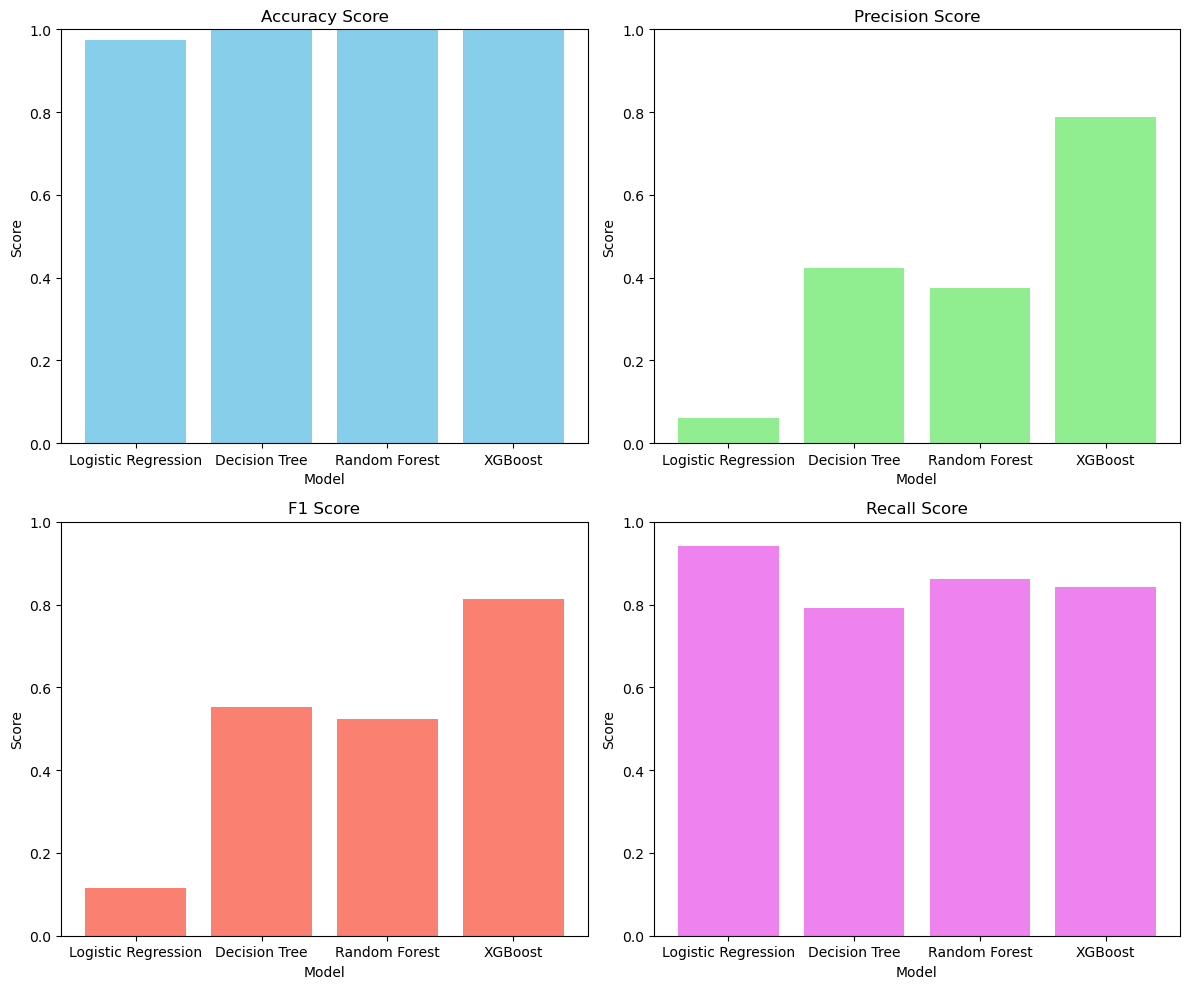

In [36]:
# Visualizing the evaluation metrics into subplots for each of the parameters : 
plt.figure(figsize=(12, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy Score'], color='skyblue')
plt.title('Accuracy Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Precision Plot
plt.subplot(2, 2, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision Score'], color='lightgreen')
plt.title('Precision Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# F1 Score Plot
plt.subplot(2, 2, 3)
plt.bar(metrics_df['Model'], metrics_df['F1 Score'], color='salmon')
plt.title('F1 Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

# Recall Plot
plt.subplot(2, 2, 4)
plt.bar(metrics_df['Model'], metrics_df['Recall Score'], color='violet')
plt.title('Recall Score')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# **Comparing the Confusion Matrix for each model**

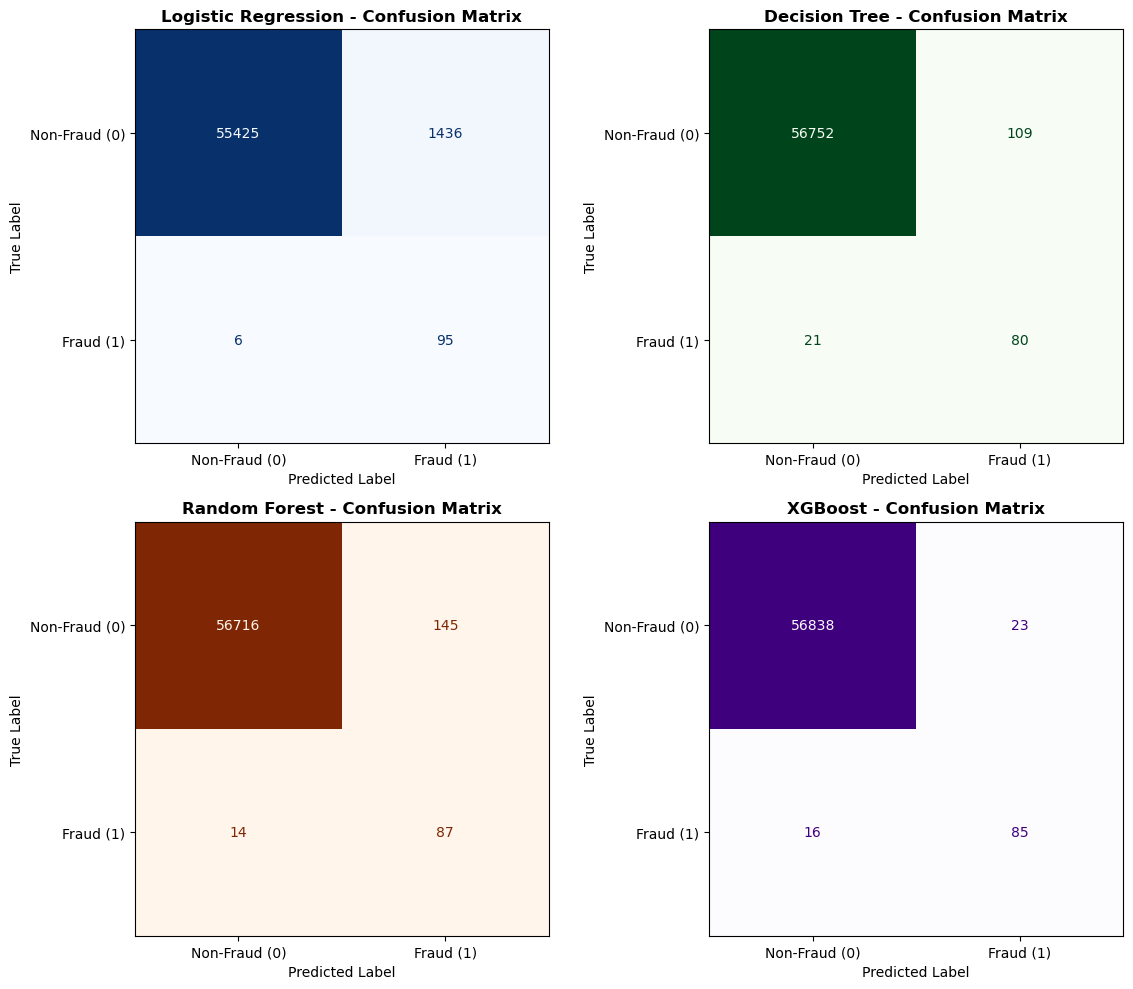

In [37]:
# Importing the required libraries : 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define all models, their predictions, and labels
model_predictions = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

# Define a color map for each model
color_maps = {
    'Logistic Regression': 'Blues',
    'Decision Tree': 'Greens',
    'Random Forest': 'Oranges',
    'XGBoost': 'Purples'
}

# Plot Confusion Matrix for each model
plt.figure(figsize=(12, 10))

for i, (model_name, y_pred) in enumerate(model_predictions.items(), 1):
    plt.subplot(2, 2, i)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraud (0)', 'Fraud (1)'])
    disp.plot(cmap=color_maps[model_name], ax=plt.gca(), colorbar=False)
    plt.title(f'{model_name} - Confusion Matrix', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()
